<a href="https://colab.research.google.com/github/ravikiraniitm17/my_git/blob/master/california_housing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np


In [17]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
print(dataset)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characte

In [18]:
X = dataset.data
y = dataset.target

print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [22]:
h = model.fit(x_train, y_train,epochs=50, batch_size=5, validation_data= (x_test, y_test))

Train on 12384 samples, validate on 8256 samples
Epoch 1/50
12384/12384 [==============================] - 3s 281us/step - loss: 0.7493 - mae: 0.5831 - val_loss: 0.4350 - val_mae: 0.4612
Epoch 2/50
12384/12384 [==============================] - 3s 275us/step - loss: 0.4201 - mae: 0.4567 - val_loss: 0.4039 - val_mae: 0.4469
Epoch 3/50
12384/12384 [==============================] - 3s 274us/step - loss: 0.4032 - mae: 0.4413 - val_loss: 0.3820 - val_mae: 0.4384
Epoch 4/50
12384/12384 [==============================] - 3s 271us/step - loss: 0.3994 - mae: 0.4291 - val_loss: 0.3682 - val_mae: 0.4121
Epoch 5/50
12384/12384 [==============================] - 3s 273us/step - loss: 0.4018 - mae: 0.4194 - val_loss: 0.3567 - val_mae: 0.4074
Epoch 6/50
12384/12384 [==============================] - 3s 277us/step - loss: 0.3962 - mae: 0.4128 - val_loss: 0.3469 - val_mae: 0.4104
Epoch 7/50
12384/12384 [==============================] - 3s 279us/step - loss: 0.4166 - mae: 0.4083 - val_loss: 0.3699 - v

In [23]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(train_loss, train_accuracy)
print("**********************")
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(val_loss, val_accuracy)

12384/12384 [==============================] - 0s 15us/step
0.2768864087394658 0.3570629060268402
**********************
8256/8256 [==============================] - 0s 15us/step
0.3011110573862643 0.36676618456840515


In [24]:
predictions = model.predict(x_test)
print(predictions)

[[1.3223197]
 [1.8985372]
 [1.9614906]
 ...
 [3.5900245]
 [2.1790197]
 [1.4536234]]


In [25]:
history_dict = h.history
print(history_dict)

{'val_loss': [0.4349690982647774, 0.4038621986603189, 0.3820301849206539, 0.3681769755782895, 0.3566920725091102, 0.3469091593108851, 0.36988347396767807, 0.3495010804726071, 0.33525549736864485, 0.3410701546305035, 0.3340518057213008, 0.3247061945583609, 0.3237555557408446, 0.36923879148537164, 0.3341826125677669, 0.32158877011660963, 0.31687217738295276, 0.33108663751327255, 0.32541878597729984, 0.33832334356823895, 0.32089275590034905, 0.3187374337180382, 0.31980590093402594, 0.3190841908409741, 0.31395187313798606, 0.31750894767128646, 0.31838403517784086, 0.32161729233061925, 0.346597501843469, 0.3219793976137127, 0.32174344131302957, 0.3155818107508483, 0.3125618115874493, 0.32222349077636325, 0.32074801055326435, 0.31562673130602614, 0.3138231790570751, 0.3317153080657703, 0.30879603572950937, 0.3320726762378977, 0.30504350464125735, 0.35632974928987887, 0.3077772666600972, 0.3124458011439546, 0.3203931478282984, 0.3070904623933431, 0.3119034897940165, 0.3122948304693735, 0.3041

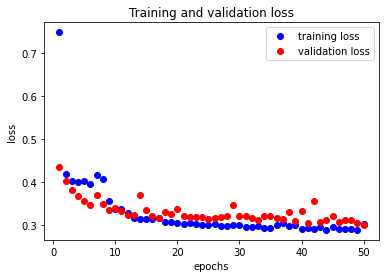

In [26]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['mae'])+1)

plt.plot(epochs, history_dict['loss'], 'bo', label = 'training loss')
plt.plot(epochs, history_dict['val_loss'], 'ro', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


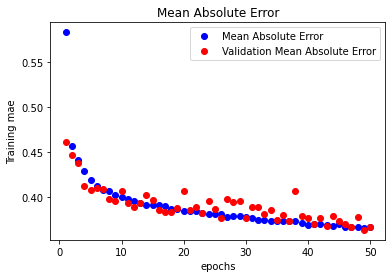

In [27]:
plt.plot(epochs, history_dict['mae'], 'bo', label = 'Mean Absolute Error')
plt.plot(epochs, history_dict['val_mae'], 'ro', label = 'Validation Mean Absolute Error')
plt.title('Mean Absolute Error')
plt.xlabel('epochs')
plt.ylabel('Training mae')
plt.legend()
plt.show()

[30.268025398254395, 86.94628410339354, 57.45093688964844, 138.761305809021, -8.808742141723647, -50.972210311889654, 73.45914704895016, -32.92965564727783, -41.32301559448243, -36.470034790039065, -20.35927200317382, -2.529431581497188, 54.1330406188965, 24.23958854675292, -43.37627468109129, -79.85025558471679, -25.9895860671997, -4.173421287536616, 7.381470537185663, -10.384007835388198, 11.075115776062017, 71.76196575164795, -16.175411987304678, -51.89441242218016, -27.938879394531256, -20.826693916320792, 11.865107727050761, 20.213188934326176, -27.298987960815424, 5.698132514953613, -37.50147953033447, -72.0510425567627, -21.53633990287781, -31.672444152832036, -8.519556808471673, -2.4167990684509366, -18.70031352043152, -21.66883182525634, -16.048288059234615, -53.85234355926514, 16.40510759353637, 4.824376106262207, 47.92153892517091, 3.597298049926767, -11.396550178527853, 57.479553031921384, 15.134742546081537, -22.405825042724615, 29.980177116394024, -109.86959934234619, -50

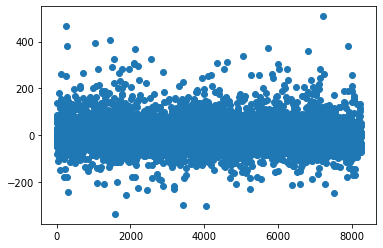

In [38]:
difference = [] # % diff list
for i in range(len(x_test)):
  diff = ((y_test[i] - predictions[i][0])*100) # in % terms
  difference.append(diff)

print(difference)

plt.scatter(range(len(difference)), difference)
plt.show()